In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ramupothuraju_ihubloans1_path = kagglehub.dataset_download('ramupothuraju/ihubloans1')

print('Data source import complete.')


100%|██████████| 27.3k/27.3k [00:00<00:00, 21.2MB/s]

Extracting files...
Data source import complete.


In [2]:
# Introduction

#**In this notebook, will analyze and build models to detect loans accounts ihub, GL balance transactions in a given dataset i hub Reconcililiation based on catalyst reconcilliation **

#We will explore the data, preprocess it, and apply several machine learning models to predict fraud, including Logistic Regression, Isolation Forest, and Local Outlier Factor.

#The performance of these models will be evaluated using common classification metrics.

# Step 1: Importing Libraries

We begin by importing the necessary libraries for data analysis, visualization, and model building:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Step 2: Loading and Exploring the iHub Loans Data

Next, we'll load the dataset and conduct some initial exploration:

In [6]:
df = pd.read_csv('/content/sample_data/iHubLoans.csv')
df.head()
df.info()
df.describe()
df.isnull().sum()  # Checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Account             1920 non-null   int64  
 1   As_of_date          1920 non-null   object 
 2   Company             1920 non-null   int64  
 3   AU                  1920 non-null   int64  
 4   Currency            1920 non-null   object 
 5   Primary Account     1920 non-null   object 
 6   Secondary Account   1920 non-null   object 
 7   GL Balance          1920 non-null   float64
 8   ihub balnce         1920 non-null   float64
 9   Balance Difference  1920 non-null   float64
 10  Match Status        1920 non-null   object 
 11  Comments            1920 non-null   object 
 12  Anomaly             0 non-null      float64
dtypes: float64(4), int64(3), object(6)
memory usage: 195.1+ KB


,0
Account,0
As_of_date,0
Company,0
AU,0
Currency,0
Primary Account,0
Secondary Account,0
GL Balance,0
ihub balnce,0
Balance Difference,0


# Step 3: Account and ihub balnace and AU Distribution

We visualize the Account distribution to understand the balance between loans and non-balnaced loans transactions:

Account
1619288    1336
1619205     377
1618001     207
Name: count, dtype: int64


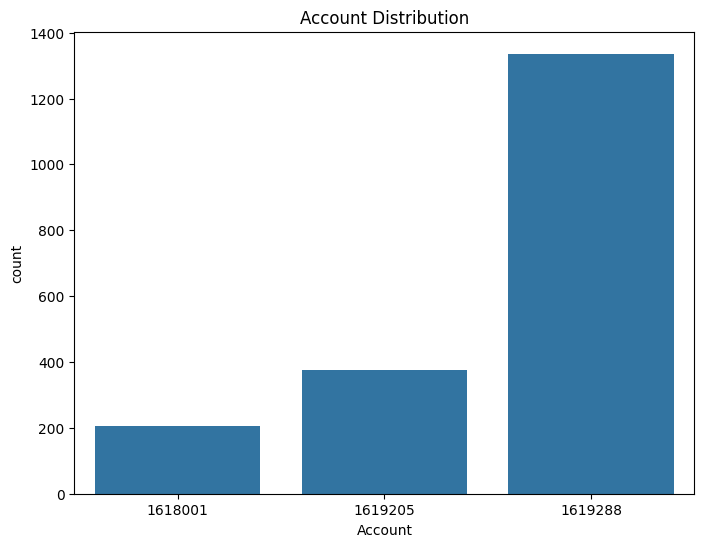

In [7]:
# Class distribution
class_counts = df['Account'].value_counts()
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Account', data=df)
plt.title('Account Distribution')
plt.show()


# Step 4: Feature-Target Separation and Data Splitting

We separate the features (X) from the target (y) and split the data into training and testing sets:

In [8]:
X = df.drop(['Account', 'As_of_date','Currency','Primary Account','Secondary Account','Match Status','Comments','Anomaly'], axis=1)
y = df['Account']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Scaling the Features

To improve model performance, we scale the features using StandardScaler:

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 6: Training a Logistic Regression Model

We build and train a Logistic Regression model:

In [10]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)



# Step 7: Outlier Detection with Isolation Forest and Local Outlier Factor

We implement two unsupervised anomaly detection algorithms—Isolation Forest and Local Outlier Factor (LOF)—to detect balance difference:

In [11]:
# Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
y_pred_if = isolation_forest.fit_predict(X)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X)

# Convert -1 to 1 (fraud) and 1 to 0 (normal)
y_pred_if = np.where(y_pred_if == -1, 1, 0)
y_pred_lof = np.where(y_pred_lof == -1, 1, 0)

# Evaluate both models
print("Isolation Forest:")
print(confusion_matrix(y, y_pred_if))


Isolation Forest:
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [ 207    0    0    0    0]
 [ 369    8    0    0    0]
 [1324   12    0    0    0]]


# Step 8: Reconciliation Analysis

We'll calculate the correlation between features and visualize it using a heatmap for reconciliation:

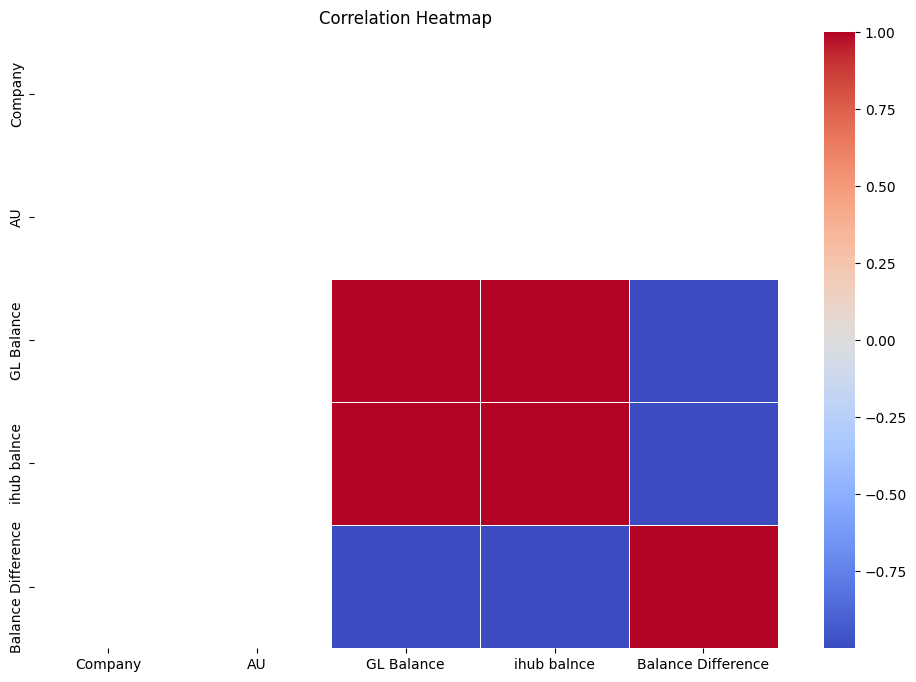

In [12]:
df2 = df.drop(['Account', 'As_of_date','Currency','Primary Account','Secondary Account','Match Status','Comments','Anomaly'], axis=1)
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Step 9: Visualizing Feature Distributions by Class

We visualize the distribution of the  GL and ihub balance based on account:

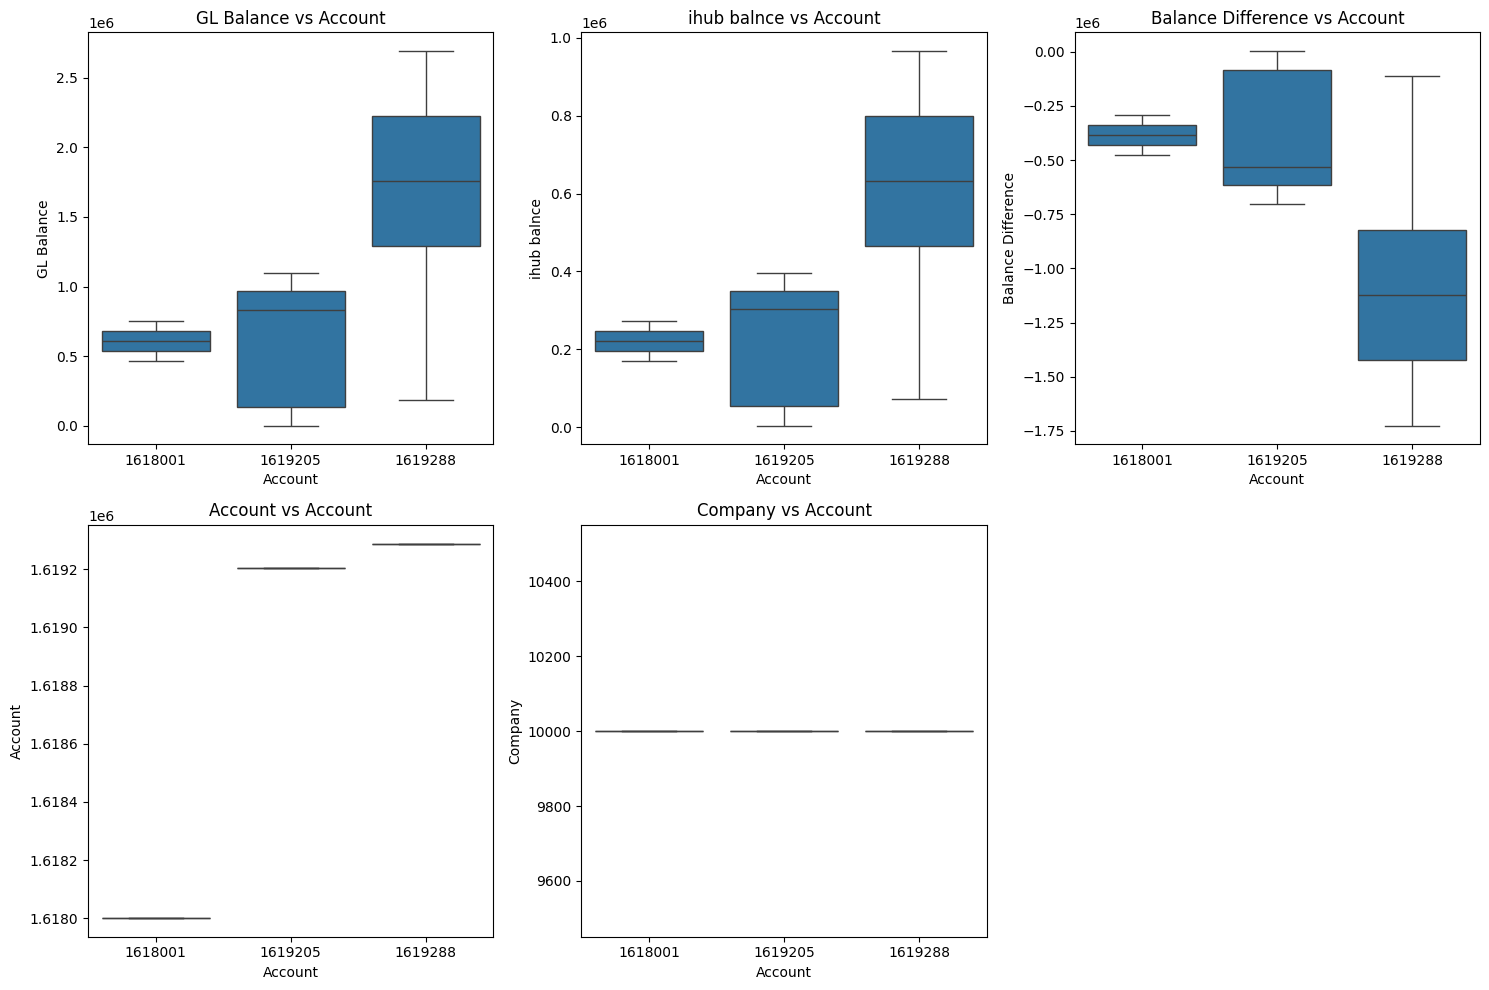

In [13]:
features = ['GL Balance', 'ihub balnce', 'Balance Difference', 'Account', 'Company']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Account', y=feature, data=df)
    plt.title(f'{feature} vs Account')

plt.tight_layout()
plt.show()


# Step 10: Separate and Describe reconcilliatio between ihub and GL balance based on hitorical Transactions

We separate Separate and Describe reconcilliatio between ihub and GL balance based on hitorical Transactions and display descriptive statistics for both:

In [15]:
fraud = df2[df2['Balance Difference'] < 0]
non_fraud = df2[df['Balance Difference'] >= 0]

print("Math Loan ihub balance Transactions:")
print(fraud.describe())

print("\nNon-match loan ihub balance Transactions:")
print(non_fraud.describe())


Math Loan ihub balance Transactions:
       Company      AU    GL Balance    ihub balnce  Balance Difference
count   1917.0  1917.0  1.917000e+03    1917.000000        1.917000e+03
mean   10001.0  1234.0  1.349635e+06  486992.258738       -8.626426e+05
std        0.0     0.0  7.748109e+05  276775.463325        4.980366e+05
min    10001.0  1234.0  6.000000e+03    4000.000000       -1.725000e+06
25%    10001.0  1234.0  6.792000e+05  247500.000000       -1.289100e+06
50%    10001.0  1234.0  1.349800e+06  487000.000000       -8.628000e+05
75%    10001.0  1234.0  2.020240e+06  726500.000000       -4.317000e+05
max    10001.0  1234.0  2.691000e+06  966000.000000       -1.500000e+03

Non-match loan ihub balance Transactions:
       Company      AU    GL Balance   ihub balnce  Balance Difference
count      3.0     3.0      3.000000      3.000000            3.000000
mean   10001.0  1234.0   6666.666667   8333.333333         1666.666667
std        0.0     0.0   4163.331999   3055.050463         

# Step 11: Comparing Model Performance

Finally, we compare the performance of all models in terms of accuracy, precision, recall, and F1-score:

In [16]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Isolation Forest', 'Local Outlier Factor'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y, y_pred_if), accuracy_score(y, y_pred_lof)],
    })

print(results)


                  Model  Accuracy
0   Logistic Regression  0.643229
1      Isolation Forest  0.000000
2  Local Outlier Factor  0.000000


# Step 12: Visualizing iHub Amount Distribution by loan Account
We visualize the distribution of the transaction amounts for loan accounts:

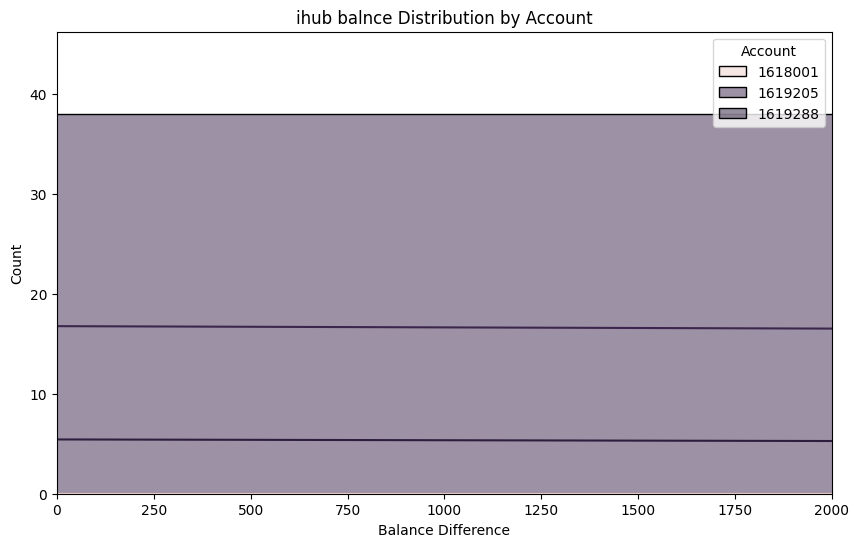

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Balance Difference', hue='Account', bins=50, kde=True)
plt.title('ihub balnce Distribution by Account')
plt.xlim(0, 2000)
plt.show()


# Conclusion
Smarter reconcilliation and anomally detection using pandas , linear regression Outlier Detection with Isolation Forest and Local Outlier Factor